In [1]:
%pip install gpxpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [37]:
import gpxpy

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

In [38]:
gpx_file_path = '/content/activity_20661398727.gpx'
csv_file_path = '/content/altitude.csv'

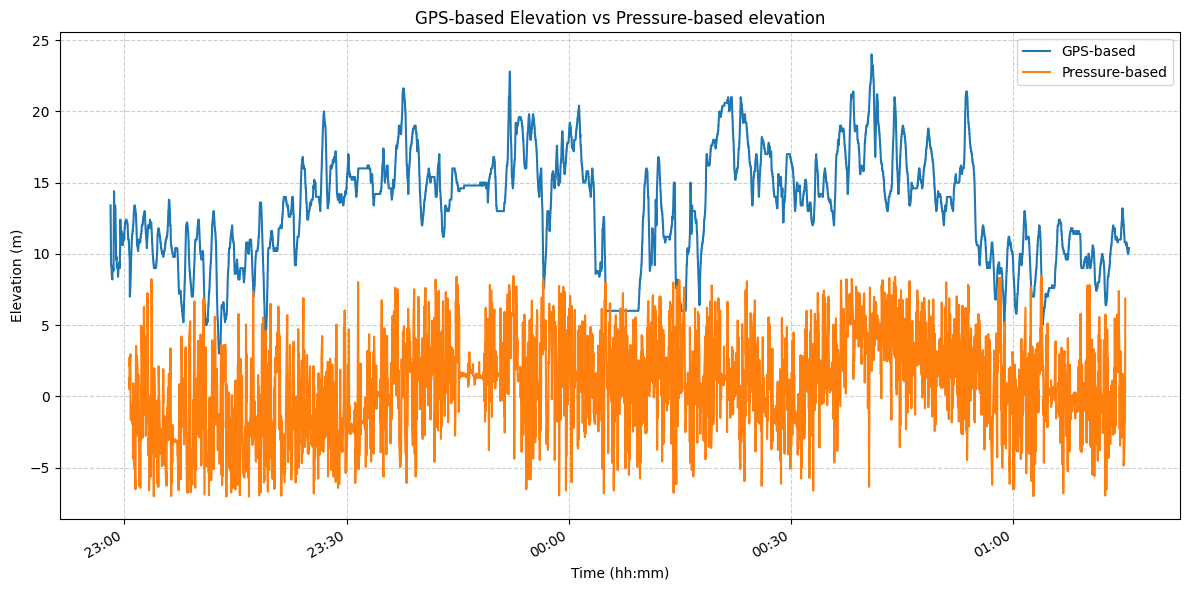

In [60]:
df = pd.read_csv(csv_file_path)

pressure_times = [datetime.fromtimestamp(ts) for ts in df['epoch']]
pressure_elevations = df['altitude']

gps_times = []
gps_elevations = []

with open(gpx_file_path, 'r') as f:
    gpx = gpxpy.parse(f)

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
          gps_times.append(point.time.replace(tzinfo=None))
          gps_elevations.append(point.elevation)

plt.figure(figsize=(12, 6))

plt.plot(gps_times, gps_elevations, label='GPS-based', linewidth=1.5)
plt.plot(pressure_times, pressure_elevations, label='Pressure-based', linewidth=1.5)

plt.title("GPS-based Elevation vs Pressure-based elevation")
plt.xlabel("Time (hh:mm)")
plt.ylabel("Elevation (m)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()

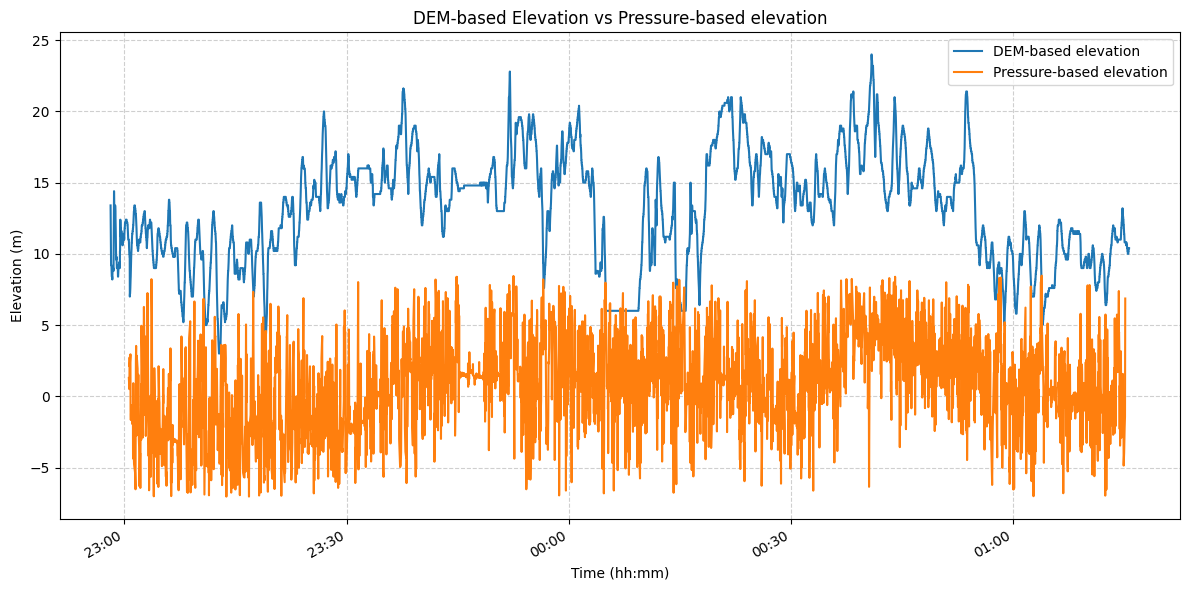

In [61]:
gpx_file_path = '/content/dem-elevation.gpx'

df = pd.read_csv(csv_file_path)

pressure_times = [datetime.fromtimestamp(ts) for ts in df['epoch']]
pressure_elevations = df['altitude']

gps_times = []
gps_elevations = []

with open(gpx_file_path, 'r') as f:
    gpx = gpxpy.parse(f)

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
          gps_times.append(point.time.replace(tzinfo=None))
          gps_elevations.append(point.elevation)

plt.figure(figsize=(12, 6))

plt.plot(gps_times, gps_elevations, label='DEM-based elevation', linewidth=1.5)
plt.plot(pressure_times, pressure_elevations, label='Pressure-based elevation', linewidth=1.5)

plt.title("DEM-based Elevation vs Pressure-based elevation")
plt.xlabel("Time (hh:mm)")
plt.ylabel("Elevation (m)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()